In [1]:
import numpy as np
from impls import *

In [21]:
X_train, X_test, y_train, y_test = load_proj_data()
print(X_train.shape)
print(y_train.shape)
# print(X_train[:5], y_train[:5], sep='\n\n')

(42, 1)
(42, 1)


### 7.1 - Varying degrees for test error

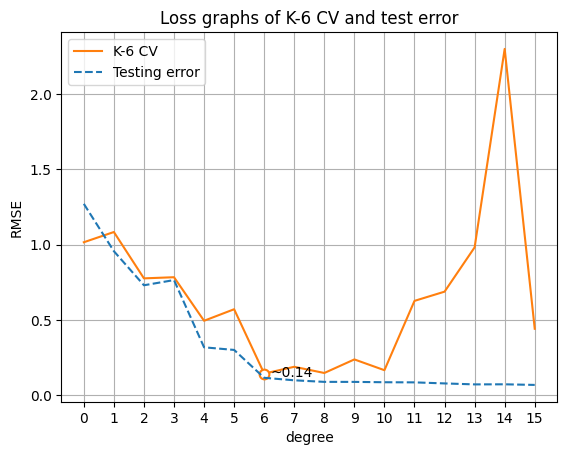

In [3]:
# reg_term = 0
k = 6
max_d = 15

degree = list(range(max_d+1))
cv_err = list()
test_err = list()
train_err = list()
for d in degree:
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            # RidgeRegressor(λ=reg_term)
            LinearRegressor()
        )
    )
    
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
    
    model.fit(X_train, y_train)
    train_err.append(model.score(X_train, y_train))
    test_err.append(model.score(X_test, y_test))

plot_line(degree, cv_err, 'K-6 CV', 'C1')
plot_line(degree, test_err, 'Testing error', 'C0--', show_min=False)
# plot_line(degree, train_err, 'Training error', 'C9', show_min=False)

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'Loss graphs of K-6 CV and test error')
plt.legend()
plt.grid()
plt.show()

In [4]:
model6 = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=6),
        StandardScaler(),
        LinearRegressor()
    )
)
model8 = OutputScalingWrapper(
    Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=8),
        StandardScaler(),
        LinearRegressor()
    )
)
model6.fit(X_train, y_train)
model8.fit(X_train, y_train)
# plt.scatter(X_train, y_train, color='C2', label='Train data')
# plt.scatter(X_test, y_test, color='C3', label='Test data', marker='x')
# years = np.array(list(range(1968, 2024)))
# years_inp = years.reshape(-1,1)

# plt.plot(years, model6.predict(years_inp), label='D6 Curve', color='C0')
# plt.plot(years, model8.predict(years_inp), 'C1--', label='D8 Curve')

# plt.xlabel('Year')
# plt.ylabel('Working-Age Population')
# plt.title('Polynomial Curve-Fitting Regression for Working-Age Data')
# plt.legend()
# plt.grid()
# plt.show()

m6w = [val[0] for val in model6.w] + [0,0]
m8w = [val[0] for val in model8.w]
print([round(abs(val1 - val2), 4) for val1, val2 in zip(m6w, m8w)])

[0.066, 0.0677, 0.7765, 0.2193, 1.4507, 0.126, 0.8379, 0.018, 0.1487]


### 7.2 - changes in architecture

In [5]:
# reg_term = 0
try:
    k = 6
    max_d = 12

    model = OutputScalingWrapper(
        Pipeline(
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )

    print(cross_val_score(model, X_train, y_train, k))


except Exception as e:
    print('error:',e)

0.506420968704648


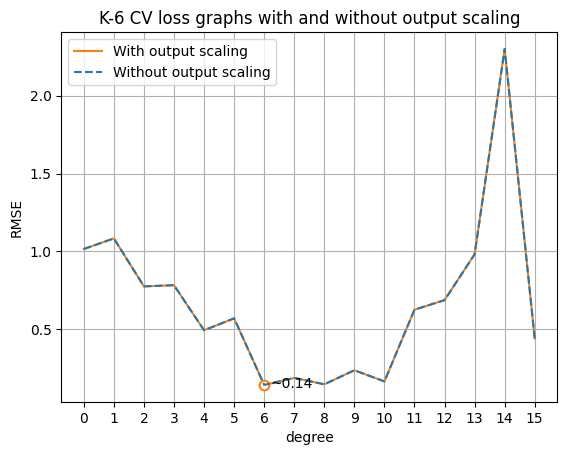

In [6]:
k = 6
max_d = 15

degree = list(range(max_d+1))
osw_err = list()
nosw_err = list()
for d in degree:
    osw_model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )
    nosw_model = Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=d),
        StandardScaler(),
        LinearRegressor()
    )
    
    osw_err.append(
        cross_val_score(osw_model, X_train, y_train, k)
    )
    nosw_err.append(
        cross_val_score(nosw_model, X_train, y_train, k)
    )
    
    model.fit(X_train, y_train)
    train_err.append(model.score(X_train, y_train))
    test_err.append(model.score(X_test, y_test))

plot_line(degree, osw_err, 'With output scaling', 'C1')
plot_line(degree, nosw_err, 'Without output scaling', 'C0--', show_min=False)
# plot_line(degree, train_err, 'Training error', 'C9', show_min=False)

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'K-6 CV loss graphs with and without output scaling')
plt.legend()
plt.grid()
plt.show()

### 7.3 - larger dataset

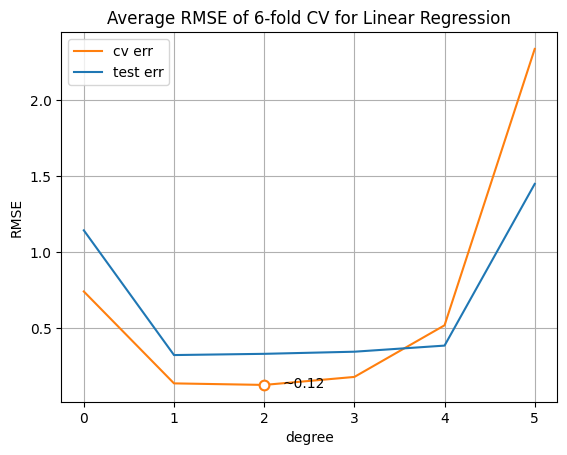

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris().data
X_train, X_test, y_train, y_test = train_test_split(
                                        data[:, :3], data[:, 3], 
                                        shuffle=False
                                    )
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

k = 6
max_d = 5
d_opt = None

degree = list(range(max_d+1))
cv_err = list()
test_err = list()
for d in degree:
    # create model
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            LinearRegressor()
        )
    )
    
    # score model
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
    model.fit(X_train, y_train)
    test_err.append(model.score(X_test, y_test))
    


# output results of cross validation
with open('../out/cv_errors_data.dat', 'w') as file:
    file.write('\n'.join(f'{d} {e}' for d, e in zip(degree, cv_err)))

d_opt = plot_line(degree, cv_err, 'cv err', 'C1')
plot_line(degree, test_err, 'test err', 'C0', show_min=False)

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'Average RMSE of 6-fold CV for Linear Regression')
plt.legend()
plt.grid()
plt.show()


### 8.2 - testing polynomial features implementation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as SKPF
d = 4; x = np.array([[1,2,3,4,5,6]])
all((SKPF(degree=d).fit_transform(x) == PolynomialFeatures(degree=d).fit_transform(x))[0])


True